In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt

In [51]:
ac_name = "6acts_logits_CIFAR10(16384)_Shallow-BN-2048.pkl"

gt_out = torch.load("6trial_logits_CIFAR10(16384)_3-layer MLP (BN-noAffine) -1024.pkl")
ac_out = torch.load(ac_name)
gt_out = torch.stack(gt_out, dim = 0)

In [52]:
print(gt_out.shape)
print(ac_out.shape)
gt_std = gt_out.std(0).mean(-1)
print(gt_std.shape)

torch.Size([6, 10000, 10])
torch.Size([10000, 10, 2048])
torch.Size([10000])


tensor([[ 0.0467,  0.0000, -0.0000,  ...,  0.0000, -0.0000, -0.0182],
        [-0.0663, -0.0000,  0.0000,  ...,  0.0000, -0.0000,  0.0551],
        [ 0.0237,  0.0000, -0.0000,  ...,  0.0000,  0.0000, -0.0559],
        ...,
        [ 0.0052,  0.0000,  0.0000,  ...,  0.0000, -0.0000, -0.1140],
        [-0.0568, -0.0000, -0.0000,  ..., -0.0000, -0.0000,  0.0734],
        [-0.0280, -0.0000,  0.0000,  ..., -0.0000,  0.0000,  0.0594]])
tensor(-0.7652)
tensor(0.5419)
(10690,)


Text(0.5, 1.0, '6acts_logits_CIFAR10(16384)_Shallow-BN-2048.pkl')

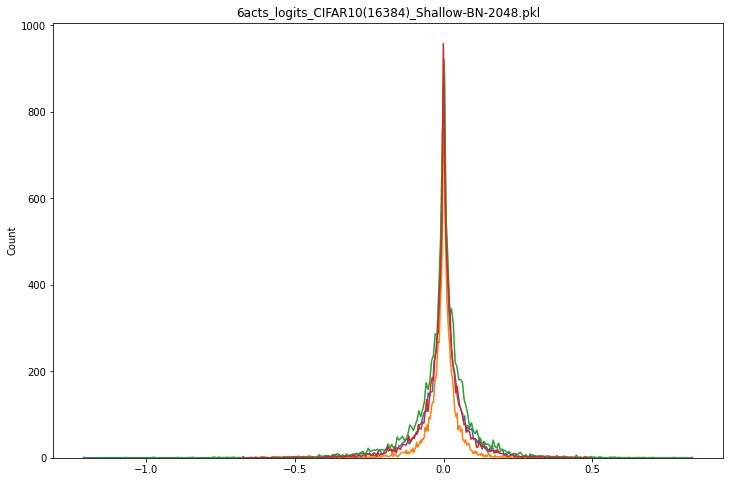

In [53]:
import seaborn as sns
import pandas as pd

print(ac_out[0])
print(ac_out[0].min())
print(ac_out[0].max())

first_out = ac_out[2].cpu().numpy()
print(first_out.nonzero()[0].shape)

nz_idx = first_out.flatten().nonzero()

plt.figure(figsize = (12, 8))
sns.histplot(ac_out[1200].cpu().numpy().flatten()[ac_out[1200].cpu().numpy().flatten().nonzero()], element = "poly", fill = False)
sns.histplot(ac_out[3250].cpu().numpy().flatten()[ac_out[3250].cpu().numpy().flatten().nonzero()], element = "poly", fill = False)
sns.histplot(ac_out[1755].cpu().numpy().flatten()[ac_out[1755].cpu().numpy().flatten().nonzero()], element = "poly", fill = False)
sns.histplot(ac_out[9736].cpu().numpy().flatten()[ac_out[9736].cpu().numpy().flatten().nonzero()], element = "poly", fill = False)

plt.title(ac_name)

In [6]:
from tqdm import tqdm

result = torch.zeros(ac_out.shape[:-1])
for i in tqdm(range(ac_out.shape[0])):
    for j in range(ac_out.shape[1]):
        hist = np.histogram(ac_out[i, j][ac_out[i, j].nonzero()], bins=50, density=True)
        data = hist[0]
        ent = -(data * np.log(np.maximum(np.abs(data), 1e-10))).sum()
        result[i, j] = ent

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:21<00:00, 470.93it/s]


In [7]:
ac_ent = result.mean(-1)

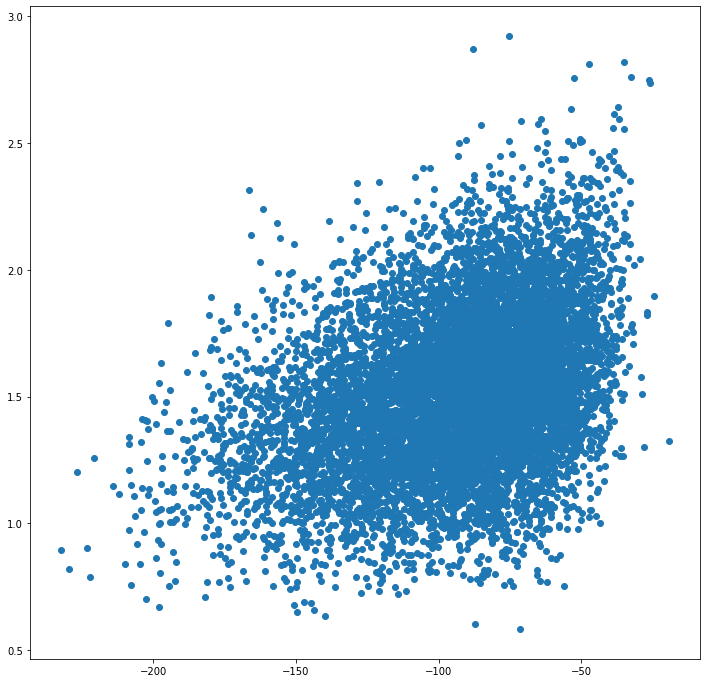

In [8]:
plt.figure(figsize = (12, 12))
plt.scatter(ac_ent, gt_std)
plt.show()